# Plots
### Gavin Rolls
This is a workspace for much of the plotting/data vis I need to do. I will do my best not to repeat visualisations created in the other files here

## Library Imports

In [42]:
#Basics
import pandas as pd
import geopandas as gpd
import numpy as np

#Plots and Stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Geometry
from shapely import wkt
from shapely.wkt import loads
from shapely.geometry import Polygon, MultiPolygon

## Data Imports

In [44]:
# Raw Overture Maps Places
london_places = gpd.read_file('data/overture_data/london_places.geojson')
bham_places = gpd.read_file('data/overture_data/bham_places.geojson')

# All London Data
all_data_london = pd.read_csv("data/combined_data/lag/all_data_london_lag.csv")

# All Birmingham Data
all_data_bham = pd.read_csv("data/combined_data/lag/all_data_bham_lag.csv")

# Convert data to GDF
all_data_london['geometry'] = all_data_london['geometry'].apply(wkt.loads)
all_data_bham['geometry'] = all_data_bham['geometry'].apply(wkt.loads)

all_data_london = gpd.GeoDataFrame(all_data_london, geometry='geometry')
all_data_bham = gpd.GeoDataFrame(all_data_bham, geometry='geometry')

all_data_london.set_crs(epsg=4326, inplace=True)
all_data_bham.set_crs(epsg=4326, inplace=True)

# Filter places to boundary areas
london_places_join = gpd.sjoin(london_places, all_data_london, how='inner', op='within')
bham_places_join = gpd.sjoin(bham_places, all_data_bham, how='inner', op='within')

london_places = london_places_join[london_places.columns]
bham_places = bham_places_join[bham_places.columns]

/Users/gavinrolls/anaconda3/envs/urbsim/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/Users/gavinrolls/anaconda3/envs/urbsim/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [45]:
# Sanity Check
london_places.head()

name           category  confidence  \
1519      The Star, Malden Rushett                pub        0.96   
1520   Hillcroft Bed And Breakfast  bed_and_breakfast        0.77   
1521                    C-Ceramics               None        0.77   
36917            The Star Gun Club        active_life        0.86   
36918      Byhurst Farm Clay Shoot               farm        0.92   

                        geometry  
1519   POINT (-0.32762 51.32683)  
1520   POINT (-0.32662 51.32736)  
1521   POINT (-0.32662 51.32736)  
36917  POINT (-0.32914 51.32922)  
36918  POINT (-0.32463 51.33735)

## Plots

### Kernel Density Estimation - Overture Maps Places

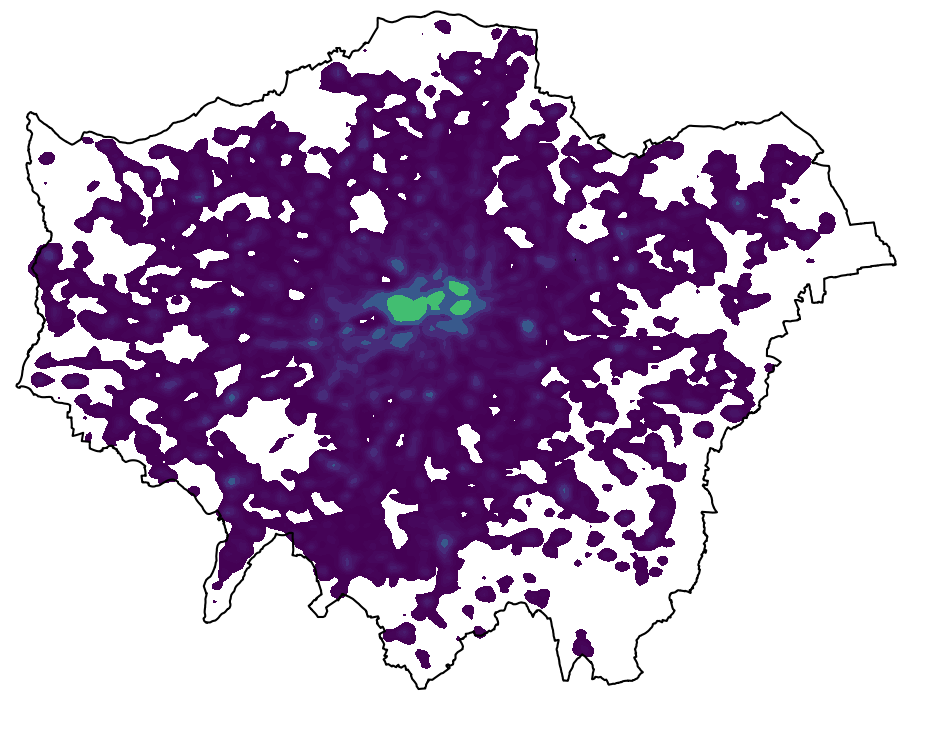

In [48]:
# Plot for Greater London

plt.figure(figsize=(12, 10))

sns.kdeplot(
    x=london_places.geometry.x,
    y=london_places.geometry.y,
    cmap='viridis',
    fill=True,
    bw_adjust=0.2
)

sns.set_theme()

greater_london_boundary = all_data_london.unary_union
boundary_gdf = gpd.GeoDataFrame(geometry=[greater_london_boundary], crs=all_data_london.crs)
boundary_gdf.boundary.plot(ax=plt.gca(), color='black')

# Add labels and title
plt.axis('off')
# plt.title('KDE Plot of Overture Places - London')

# Show the plot
plt.show()

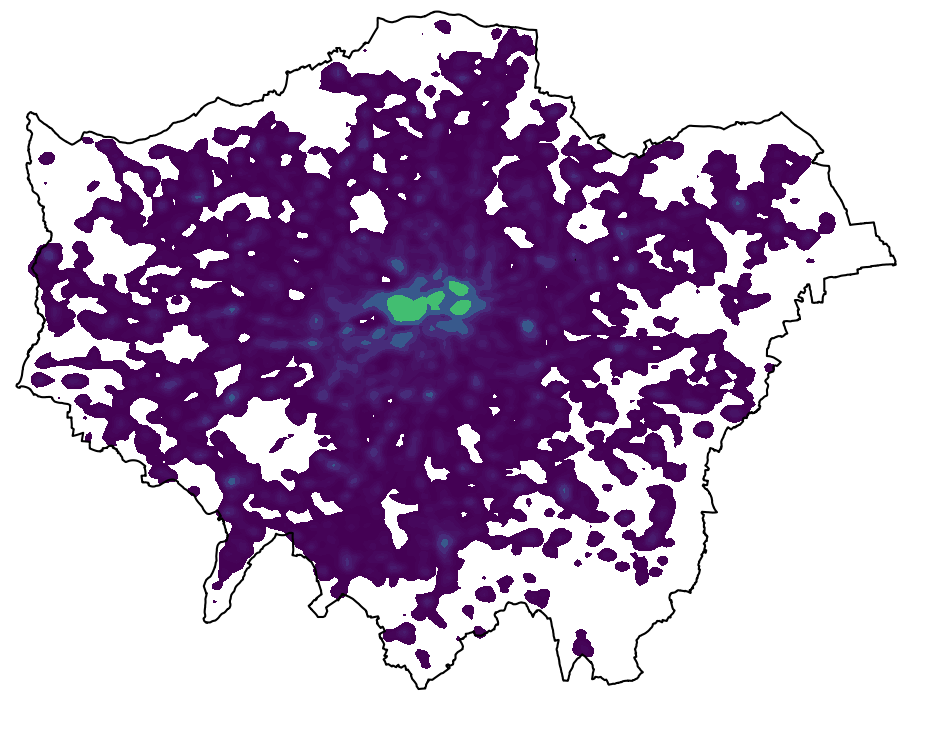

In [49]:
# Plot for Greater London

plt.figure(figsize=(12, 10))

sns.kdeplot(
    x=london_places.geometry.x,
    y=london_places.geometry.y,
    cmap='viridis',
    fill=True,
    bw_adjust=0.2
)

sns.set_theme()

greater_london_boundary = all_data_london.unary_union
boundary_gdf = gpd.GeoDataFrame(geometry=[greater_london_boundary], crs=all_data_london.crs)
boundary_gdf.boundary.plot(ax=plt.gca(), color='black')

# Add labels and title
plt.axis('off')
# plt.title('KDE Plot of Overture Places - London')

# Show the plot
plt.show()

### Histogram of POIs per LSOA

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_15786/1191484469.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])


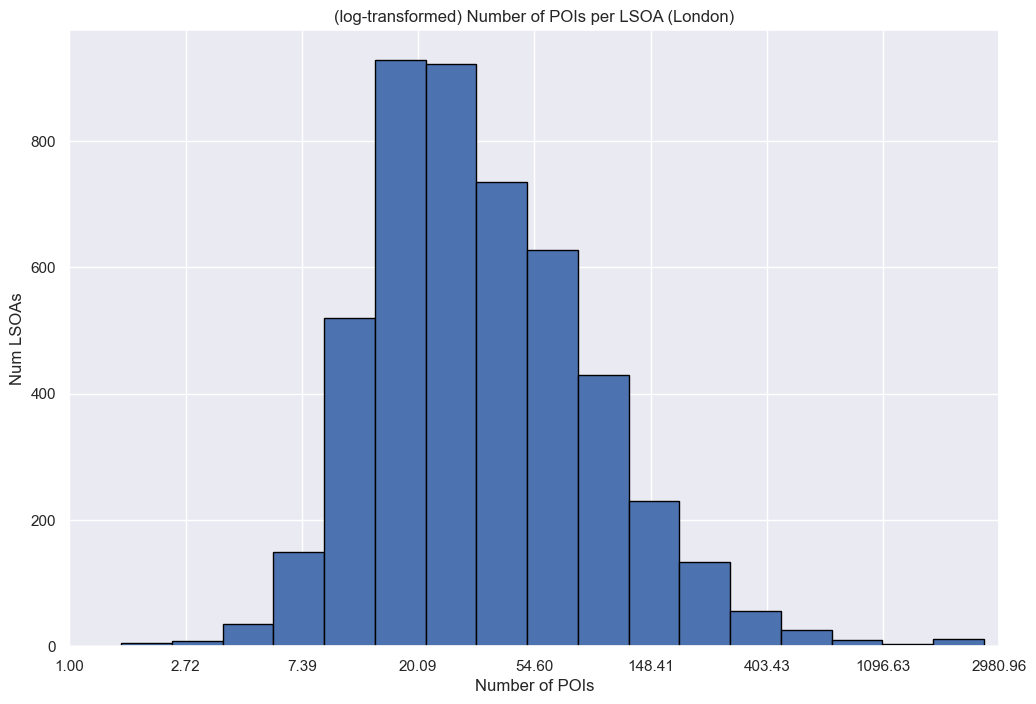

In [51]:
places_per_lsoa = pd.DataFrame(all_data_london['log_num_places'])

plt.figure(figsize=(12, 8))
plt.hist(places_per_lsoa, bins=20, edgecolor='black')
sns.set_theme()
plt.xlim(0,8)
plt.ylabel('Num LSOAs')
plt.xlabel('Number of POIs')
tick_vals = plt.gca().get_xticks()
transformed_tick_labels = np.exp(tick_vals)
plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])
plt.title('(log-transformed) Number of POIs per LSOA (London)')
plt.show()

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_15786/1130265843.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])


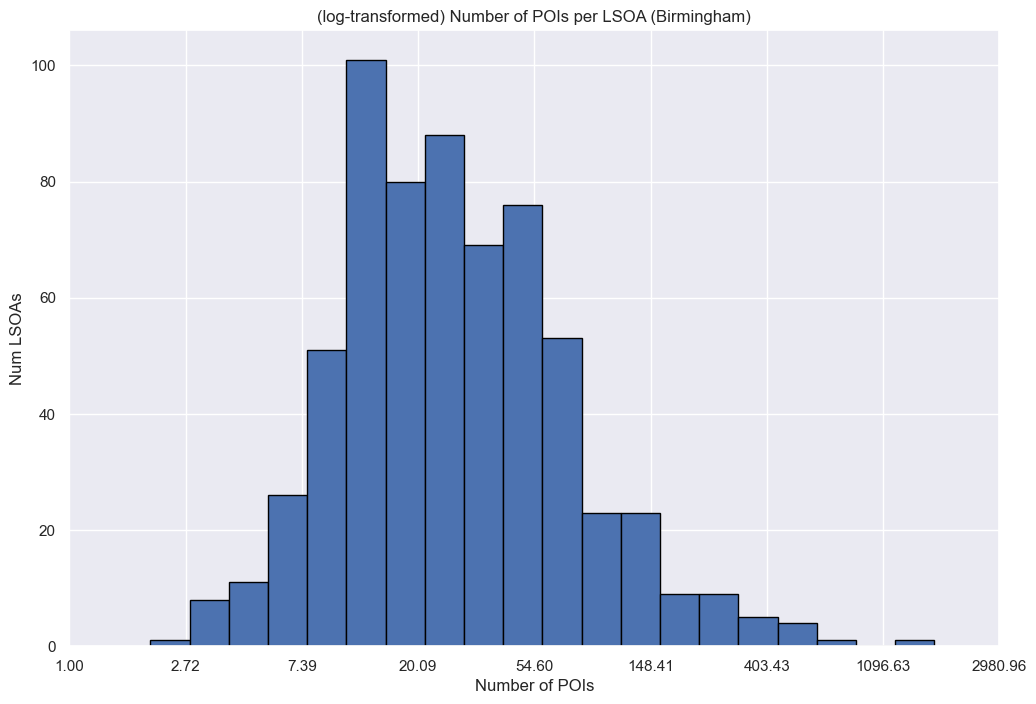

In [52]:
places_per_lsoa = pd.DataFrame(all_data_bham['log_num_places'])

plt.figure(figsize=(12, 8))
plt.hist(places_per_lsoa, bins=20, edgecolor='black')
sns.set_theme()
plt.xlim(0,8)
plt.ylabel('Num LSOAs')
plt.xlabel('Number of POIs')
tick_vals = plt.gca().get_xticks()
transformed_tick_labels = np.exp(tick_vals)
plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])
plt.title('(log-transformed) Number of POIs per LSOA (Birmingham)')
plt.show()

### Frequency of Place Types (Top 20)

In [54]:
all_places = pd.concat([london_places, bham_places], axis=0)

category_counts = all_places['category'].value_counts()

category_top = all_places['category'].value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=category_top.values, y=category_top.index, palette='viridis')
sns.set_theme()
plt.xlabel('Count')
plt.ylabel('POI Category')
plt.title('Top 20 POI Categories (Uncondensed)')
plt.show()

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_15786/2539250406.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_top.values, y=category_top.index, palette='viridis')


### Frequency of Place Types (Top 20 Condensed)

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_15786/2399647150.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condensed_top['Count'], y=condensed_top.index, palette='viridis')


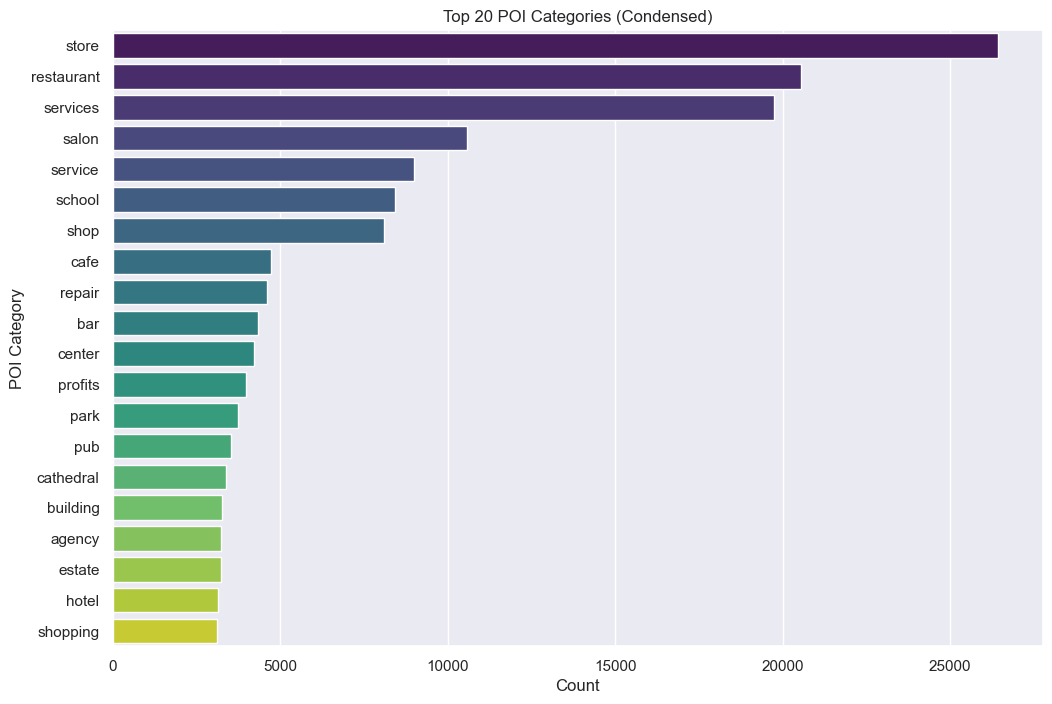

In [56]:
# Recycle the category collapse logic from DataCleaning.ipynb

# Automated Condensing of Column Types

# I'll group them by 'suffix' to find commonalities
suffix_groups = {}

# Iterate through
for index in category_counts.index:
    lower_index = index.lower()
    parts = lower_index.split('_')
    if len(parts) > 1:
        suffix = parts[-1]
        if suffix in suffix_groups:
            suffix_groups[suffix] += category_counts.loc[index].sum()
        else:
            suffix_groups[suffix] = category_counts.loc[index].sum()
    else:
        # Handle rows without suffixes
        suffix_groups[parts[0]] = category_counts.loc[index].sum()

condensed_categories = pd.DataFrame.from_dict(suffix_groups, orient='index', columns=['Count'])

condensed_categories_sorted = condensed_categories.sort_values(by='Count', ascending=False)

condensed_top = condensed_categories_sorted.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=condensed_top['Count'], y=condensed_top.index, palette='viridis')
sns.set_theme()
plt.xlabel('Count')
plt.ylabel('POI Category')
plt.title('Top 20 POI Categories (Condensed)')
plt.show()

### Collinearity Checks

In [71]:
# Get logged variables

epsilon = 1e-10

all_data_london['log_employment_density'] = np.log(all_data_london['employment_density'].replace(0, epsilon))
all_data_london['log_office_employment_density'] = np.log(all_data_london['office_employment_density'].replace(0, epsilon))

all_data_bham['log_employment_density'] = np.log(all_data_bham['employment_density'].replace(0, epsilon))
all_data_bham['log_office_employment_density'] = np.log(all_data_bham['office_employment_density'].replace(0, epsilon)) 

# London

selected_columns = [
    'log_total_employment',
    'log_employment_density',
    'log_office_employment_density',
    'population',
    'log_num_places',
    'log_num_buildings',
    'all_avg_building_area',
    'all_lsoa_area_ratio',
    'all_total_area',
    'all_store',
    'all_restaurant',
    'all_services',
    'all_salon',
    'all_service',
    'all_school',
    'all_shop',
    'all_cafe',
    'all_repair',
    'all_bar'
]

column_display_names = {
    'log_total_employment': 'Total Employment (log)',
    'log_employment_density': 'Employment Density (log)',
    'log_office_employment_density': 'Office Employment Density (log)',
    'population': 'Population',
    'log_num_places': 'Number of POIs (log)',
    'log_num_buildings': 'Number of Buildings (log)',
    'all_avg_building_area': 'Average Building Area',
    'all_lsoa_area_ratio': 'Building Density',
    'all_total_area': 'Total Area of Buildings',
    'all_store': 'Stores',
    'all_restaurant': 'Restaurants',
    'all_services': 'Services',
    'all_salon': 'Salons',
    'all_service': 'Service',
    'all_school': 'Schools',
    'all_shop': 'Shops',
    'all_cafe': 'Cafes',
    'all_repair': 'Repair Shops',
    'all_bar': 'Bars'
}

colinearity_features = all_data_london[selected_columns]

plt.figure(figsize=(20,15))

# Heatmap
sns.set_theme()
heatmap = sns.heatmap(colinearity_features.corr(), annot=True, cmap='seismic', vmin=-1, vmax=1)

xticklabels = heatmap.get_xticklabels()
yticklabels = heatmap.get_yticklabels()
heatmap.set_xticklabels([column_display_names[label.get_text()] for label in xticklabels], fontsize=20)
heatmap.set_yticklabels([column_display_names[label.get_text()] for label in yticklabels], fontsize=20)

plt.title('Correlation Between LSOA Features - London', fontsize=20)
plt.show()


In [59]:
# VIF Calculations

colinearity_features_cleaned = colinearity_features.replace([np.inf, -np.inf], np.nan).dropna()
colinearity_features_cleaned = colinearity_features.replace([np.inf, -np.inf], np.nan).fillna(colinearity_features.mean())

X = colinearity_features_cleaned.values

vif_data = pd.DataFrame()
vif_data["Variable"] = colinearity_features.columns
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# VIF summary stats
average_vif = vif_data["VIF"].mean()
min_vif = vif_data["VIF"].min()
max_vif = vif_data["VIF"].max()
median_vif = vif_data["VIF"].median()

# Print
print(f"Average VIF: {average_vif}")
print(f"Minimum VIF: {min_vif}")
print(f"Maximum VIF: {max_vif}")
print(f"Median VIF: {median_vif}")

Average VIF: 16.464753609716272
Minimum VIF: 2.2398852016137654
Maximum VIF: 68.07140570842357
Median VIF: 9.355444158324582


In [60]:
# Birmingham

selected_columns = [
    'log_total_employment',
    'log_employment_density',
    'logoffice_employment_density',
    'population',
    'log_num_places',
    'log_num_buildings',
    'all_avg_building_area',
    'all_lsoa_area_ratio',
    'all_total_area',
    'all_store',
    'all_restaurant',
    'all_services',
    'all_salon',
    'all_service',
    'all_school',
    'all_shop',
    'all_cafe',
    'all_repair',
    'all_bar'
]

colinearity_features = all_data_bham[selected_columns]

plt.figure(figsize=(20,15))

# Heatmap
sns.set_theme()
heatmap = sns.heatmap(colinearity_features.corr(), annot=True, cmap='seismic', vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14) 
plt.title('Correlation Between LSOA Features - Birmingham', fontsize=18)
plt.show()


KeyError: "['logoffice_employment_density'] not in index"

### Example Building Footprint Images

These have been taken from my old repository and are stored in the plots folder

### Building Counts (By Type and Overall) - Per City

In [ ]:
# Total Number of Buildings by Type - London, Bham, Total


total_buildings_london = all_data_london['num_buildings'].sum()
total_commercial_buildings_london = all_data_london['num_commercial_buildings'].sum()
total_retail_buildings_london = all_data_london['num_retail_buildings'].sum()
total_office_buildings_london = all_data_london['num_office_buildings'].sum()
total_residential_buildings_london = all_data_london['num_residential_buildings'].sum()

total_buildings_bham = all_data_bham['num_buildings'].sum()
total_commercial_buildings_bham = all_data_bham['num_commercial_buildings'].sum()
total_retail_buildings_bham = all_data_bham['num_retail_buildings'].sum()
total_office_buildings_bham = all_data_bham['num_office_buildings'].sum()
total_residential_buildings_bham = all_data_bham['num_residential_buildings'].sum()

percent_unclassed_london = (total_buildings_london - total_commercial_buildings_london - total_retail_buildings_london - total_office_buildings_london - total_residential_buildings_london) / total_buildings_london
percent_commercial_buildings_london = total_commercial_buildings_london / total_buildings_london
percent_retail_buildings_london = total_retail_buildings_london / total_buildings_london
percent_office_buildings_london = total_office_buildings_london / total_buildings_london
percent_residential_buildings_london = total_residential_buildings_london / total_buildings_london

percent_unclassed_bham = (total_buildings_bham - total_commercial_buildings_bham - total_retail_buildings_bham - total_office_buildings_bham - total_residential_buildings_bham) / total_buildings_bham
percent_commercial_buildings_bham = total_commercial_buildings_bham / total_buildings_bham
percent_retail_buildings_bham = total_retail_buildings_bham / total_buildings_bham
percent_office_buildings_bham = total_office_buildings_bham / total_buildings_bham
percent_residential_buildings_bham = total_residential_buildings_bham / total_buildings_bham


print('----- London -----')
print('Total Buildings: ' + str(total_buildings_london))
print('Commercial Buildings: ' + str(total_commercial_buildings_london) + ' (' + str(round(percent_commercial_buildings_london * 100, 2)) + '%)')
print('Retail Buildings: ' + str(total_retail_buildings_london) + ' (' + str(round(percent_retail_buildings_london * 100, 2)) + '%)')
print('Office Buildings: ' + str(total_office_buildings_london) + ' (' + str(round(percent_office_buildings_london * 100, 2)) + '%)')
print('Residential Buildings: ' + str(total_residential_buildings_london) + ' (' + str(round(percent_residential_buildings_london * 100, 2)) + '%)')
print('Unclassified Buildings: ' + str(total_buildings_london - total_commercial_buildings_london - total_retail_buildings_london - total_office_buildings_london - total_residential_buildings_london) + ' (' + str(round(percent_unclassed_london * 100, 2)) + '%)')

# Print the results for Birmingham
print('----- Birmingham -----')
print('Total Buildings: ' + str(total_buildings_bham))
print('Commercial Buildings: ' + str(total_commercial_buildings_bham) + ' (' + str(round(percent_commercial_buildings_bham * 100, 2)) + '%)')
print('Retail Buildings: ' + str(total_retail_buildings_bham) + ' (' + str(round(percent_retail_buildings_bham * 100, 2)) + '%)')
print('Office Buildings: ' + str(total_office_buildings_bham) + ' (' + str(round(percent_office_buildings_bham * 100, 2)) + '%)')
print('Residential Buildings: ' + str(total_residential_buildings_bham) + ' (' + str(round(percent_residential_buildings_bham * 100, 2)) + '%)')
print('Unclassified Buildings: ' + str(total_buildings_bham - total_commercial_buildings_bham - total_retail_buildings_bham - total_office_buildings_bham - total_residential_buildings_bham) + ' (' + str(round(percent_unclassed_bham * 100, 2)) + '%)')


### Histogram of Building Type Count per LSOA

In [ ]:
# Buildings per LSOA London

num_buildings_per_lsoa = pd.DataFrame(all_data_london['log_num_buildings'])

plt.figure(figsize=(12, 8))
plt.hist(num_buildings_per_lsoa, bins=20, edgecolor='black')
plt.xlim(-0.5,8)
sns.set_theme()
plt.ylabel('Num LSOAs')
plt.xlabel('Number of Buildings')
# plt.title('(log-transformed) Number of Buildings per LSOA (London)')
tick_vals = plt.gca().get_xticks()
transformed_tick_labels = np.exp(tick_vals)
plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])
plt.show()

In [ ]:
# Buildings per LSOA Bham

num_buildings_per_lsoa = pd.DataFrame(all_data_bham['log_num_buildings'])

plt.figure(figsize=(12, 8))
plt.hist(num_buildings_per_lsoa, bins=10, edgecolor='black')
plt.xlim(-0.5,8)
sns.set_theme()
plt.ylabel('Num LSOAs')
plt.xlabel('Number of Buildings')
# plt.title('(log-transformed) Number of Buildings per LSOA (Birmingham)')
tick_vals = plt.gca().get_xticks()
transformed_tick_labels = np.exp(tick_vals)
plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])
plt.show()

### Feature Distribution Maps (See Exploratory Data Analysis Section for List of Needed)

In [ ]:
# POIs in London

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
all_data_london.plot(ax=ax, column='log_num_places', linewidth=0, legend = True, cmap='viridis',
                     legend_kwds = {
                         'label': "POI Count (log)",
                        'orientation': "horizontal",
                        'pad' : 0.00,
                        'shrink': 0.4,
                        'aspect': 30})

# plt.title('Overture POI Count Map of London LSOAs (log-transformed)')
ax.set_axis_off()
plt.show()

In [ ]:
# POIs in Birmingham

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
sns.set_theme()
all_data_bham.plot(ax=ax, column='log_num_places', linewidth=0, legend = True, cmap='viridis',
                     legend_kwds = {
                         'label': "POI Count (log)",
                        'orientation': "horizontal",
                        'pad' : 0.00,
                        'shrink': 0.4,
                        'aspect': 30})

# plt.title('Overture POI Count Map of Birmingham LSOAs (log-transformed)')
ax.set_axis_off()
plt.show()

In [ ]:
# Employment (log) in London

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
all_data_london.plot(ax=ax, column='log_total_employment', linewidth=0, legend = True, cmap='viridis',
                     legend_kwds = {
                         'label': "Employment Count (log)",
                        'orientation': "horizontal",
                        'pad' : 0.00,
                        'shrink': 0.4,
                        'aspect': 30})

# plt.title('Overture POI Count Map of London LSOAs (log-transformed)')
ax.set_axis_off()
plt.show()

In [ ]:
# Employment (log) in Birmingham

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
all_data_bham.plot(ax=ax, column='log_total_employment', linewidth=0, legend = True, cmap='viridis',
                     legend_kwds = {
                         'label': "Employment Count (log)",
                        'orientation': "horizontal",
                        'pad' : 0.00,
                        'shrink': 0.4,
                        'aspect': 30})

# plt.title('Overture POI Count Map of Birmingham LSOAs (log-transformed)')
ax.set_axis_off()
plt.show()

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_82565/4202094532.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])


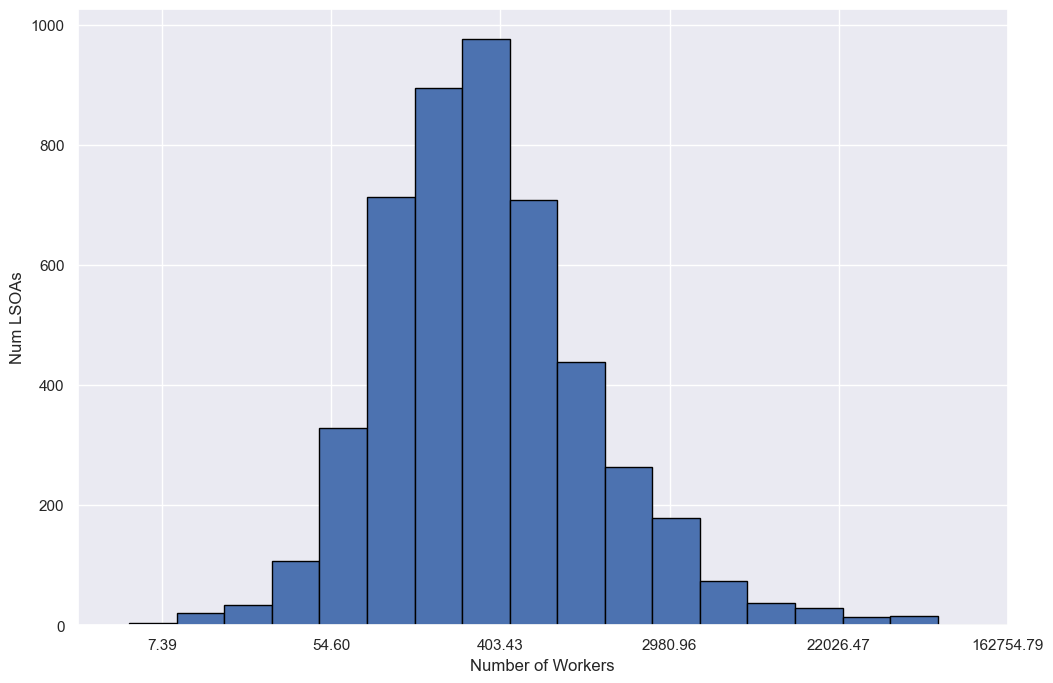

In [330]:
# Total Employment per LSOA London

num_workers_per_lsoa = pd.DataFrame(all_data_london['log_total_employment'])

plt.figure(figsize=(12, 8))
plt.hist(num_workers_per_lsoa, bins=20, edgecolor='black')
plt.gca().set_xlim(1,12)
sns.set_theme()
plt.ylabel('Num LSOAs')
plt.xlabel('Number of Workers')
# plt.title('(log-transformed) Number of Workers per LSOA (London)')
tick_vals = plt.gca().get_xticks()
plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])
transformed_tick_labels = np.exp(tick_vals)

plt.show()

In [332]:
# Total Employment per LSOA Bham

num_workers_per_lsoa = pd.DataFrame(all_data_bham['log_total_employment'])

plt.figure(figsize=(12, 8))
plt.hist(num_workers_per_lsoa, bins=20 , edgecolor='black')
plt.gca().set_xlim(1,12)
sns.set_theme()
plt.ylabel('Num LSOAs')
plt.xlabel('Number of Workers')
# plt.title('(log-transformed) Number of Workers per LSOA (Birmingham)')
tick_vals = plt.gca().get_xticks()
plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])
transformed_tick_labels = np.exp(tick_vals)
plt.show()

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_82565/3787687268.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{val:.2f}' for val in transformed_tick_labels])


### Overture Places Confidence Histogram

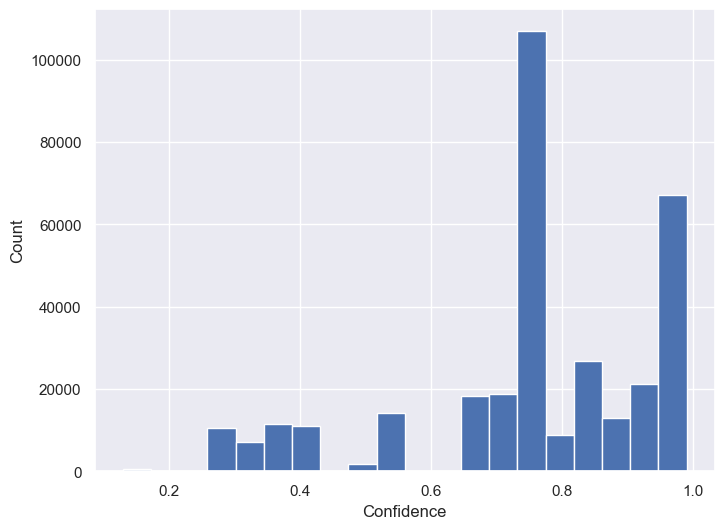

In [193]:
plt.figure(figsize=(8, 6))
plt.hist(all_places['confidence'], bins = 20, fill=True)
plt.xlabel('Confidence')
plt.ylabel('Count')
# plt.title('Histogram of Overture POI Confidence Values')
plt.grid(True)
plt.show()

### Modeling Results Boxplots

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_15786/3013832703.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sub_labels, rotation=45, fontsize=20)


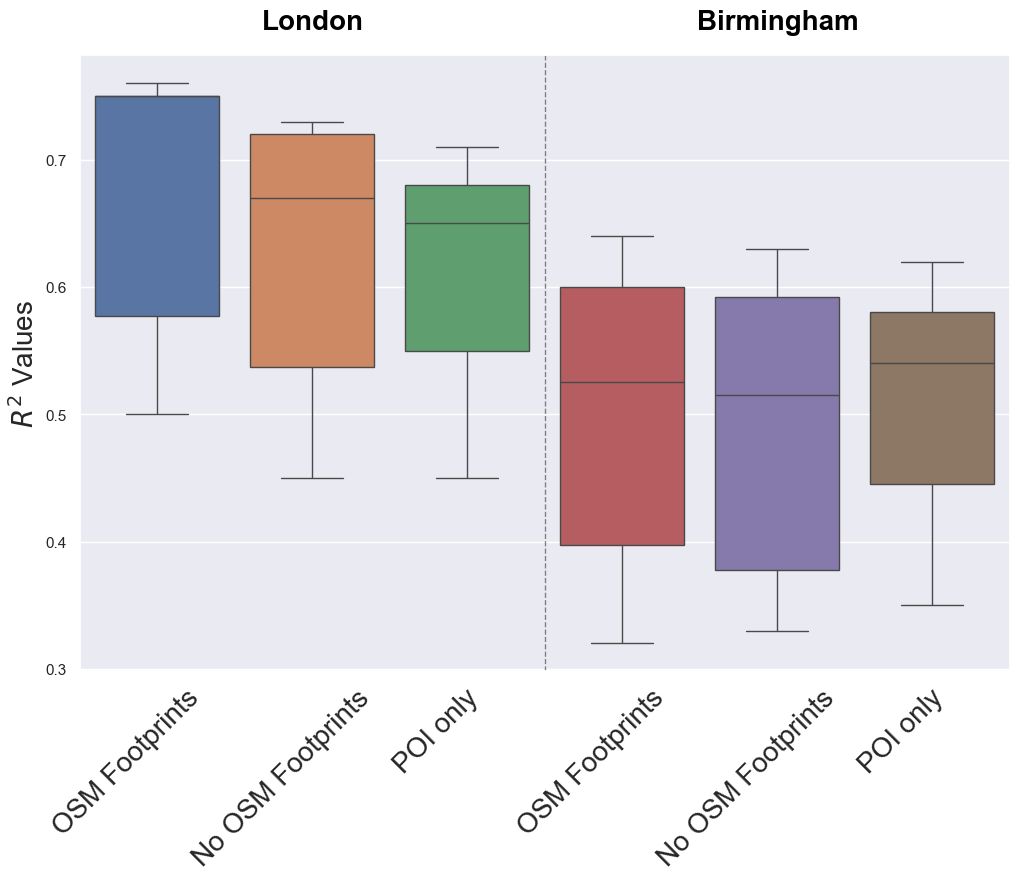

In [142]:
# Input Datasets

data = {
    'London OSM Footprints': [0.76, 0.75, 0.5, 0.75, 0.75, 0.52],
    'London no Footprints': [0.73, 0.65, 0.45, 0.73, 0.69, 0.5],
    'London POI only': [0.71, 0.65, 0.45, None, None, None],
    'Birmingham OSM Footprints': [0.64, 0.54, 0.32, 0.62, 0.51, 0.36],
    'Birmingham no Footprints': [0.63, 0.54, 0.33, 0.61, 0.49, 0.34],
    'Birmingham POI only': [0.62, 0.54, 0.35, None, None, None]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df)
plt.ylabel(r'$R^2$ Values', fontsize=20)

sub_labels = ['OSM Footprints', 'No OSM Footprints', 'POI only',
              'OSM Footprints', 'No OSM Footprints', 'POI only']
ax.set_xticklabels(sub_labels, rotation=45, fontsize=20)

current_xticks = ax.get_xticks()
move_amount = 0.2
adjusted_xticks = [tick - move_amount for tick in current_xticks]
ax.set_xticks(adjusted_xticks)

# City labels
group_labels = ['London', 'Birmingham']
x_coords = [1, 4]

for i, label in enumerate(group_labels):
    ax.text(x_coords[i], max(df.max()) * 1.05, label, fontsize=20, weight='bold',
            ha='center', va='bottom', color='black')

# Dividing Line
ax.axvline(x=2.5, color='gray', linestyle='--', linewidth=1)

plt.show()

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_15786/2102660436.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Group', y='Value', data=group_df, palette=palette)
/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_15786/2102660436.py:27: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.boxplot(x='Group', y='Value', data=group_df, palette=palette)
/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_15786/2102660436.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sub_labels, rotation=45, fontsize=20)


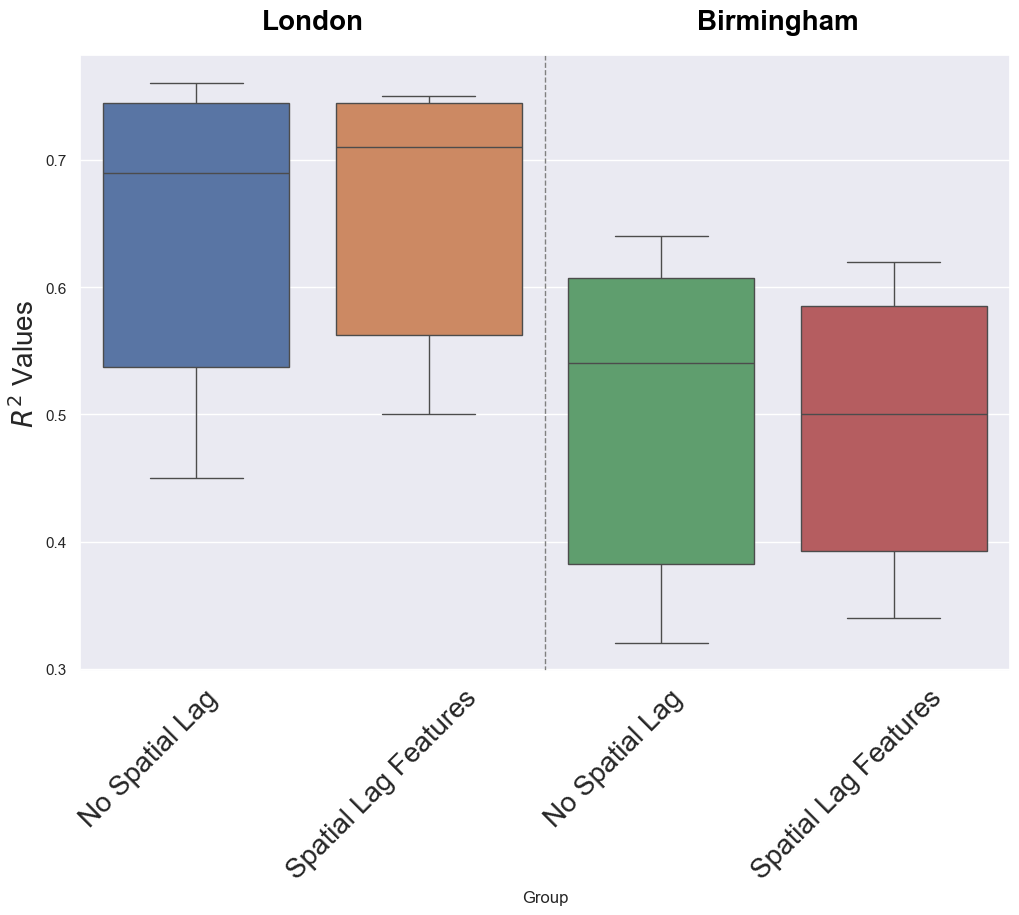

In [138]:
# Spatial Lag (Separate by city)

# Drop POI only sets for direct comparison
df_filtered = df.drop(columns=['London POI only', 'Birmingham POI only'])

london_nolag = df_filtered.iloc[:3, :2].values.flatten()
london_lag = df_filtered.iloc[3:, :2].values.flatten()
bham_nolag = df_filtered.iloc[:3, 2:].values.flatten()
bham_lag = df_filtered.iloc[3:, 2:].values.flatten()
# Combine into a new DataFrame for plotting
group_data = {
    'Group': ['London No Lag'] * len(london_nolag) + 
              ['London Lag'] * len(london_lag) + 
              ['Birmingham No Lag'] * len(bham_nolag) + 
              ['Birmingham Lag'] * len(bham_lag),
    'Value': list(london_nolag) + 
             list(london_lag) + 
             list(bham_nolag) + 
             list(bham_lag)
}

group_df = pd.DataFrame(group_data)

# Plot
plt.figure(figsize=(12, 8))
palette = sns.color_palette()
ax = sns.boxplot(x='Group', y='Value', data=group_df, palette=palette)

# Set axis labels
plt.ylabel(r'$R^2$ Values', fontsize=20)

# Group labels
sub_labels = ['No Spatial Lag', 'Spatial Lag Features', 'No Spatial Lag', 'Spatial Lag Features']
ax.set_xticklabels(sub_labels, rotation=45, fontsize=20)

current_xticks = ax.get_xticks()
move_amount = 0.2
adjusted_xticks = [tick - move_amount for tick in current_xticks]
ax.set_xticks(adjusted_xticks)

# City labels
group_labels = ['London', 'Birmingham']
x_coords = [0.5, 2.5]

for i, label in enumerate(group_labels):
    ax.text(x_coords[i], max(df.max()) * 1.05, label, fontsize=20, weight='bold',
            ha='center', va='bottom', color='black')

# Dividing Line
ax.axvline(x=1.5, color='gray', linestyle='--', linewidth=1)

In [120]:
# Target Variable (Separate by city)

# Drop POI only sets for direct comparison

london_empl = df.iloc[[0, 3], :3].values.flatten()
london_density = df.iloc[[1, 4], :3].values.flatten()
london_office = df.iloc[[2, 5], :3].values.flatten()
bham_empl = df.iloc[[0, 3], 3:].values.flatten()
bham_density = df.iloc[[1, 4], 3:].values.flatten()
bham_office = df.iloc[[2, 5], 3:].values.flatten()

group_data = {
    'Group': (['London Employment (log)'] * len(london_empl) + 
              ['London Employment Density (log)'] * len(london_density) + 
              ['London Office Employment Density (log)'] * len(london_office) + 
              ['Birmingham Employment (log)'] * len(bham_empl) + 
              ['Birmingham Employment Density (log)'] * len(bham_density) + 
              ['Birmingham Office Employment Density (log)'] * len(bham_office)),
    'Value': (list(london_empl) + 
              list(london_density) + 
              list(london_office) + 
              list(bham_empl) + 
              list(bham_density) + 
              list(bham_office))
}

plt.figure(figsize=(10, 6))
sns.color_palette()
ax = sns.boxplot(x='Group', y='Value', data=group_data, palette=palette)
plt.ylabel(r'$R^2$ Values', fontsize=16)

sub_labels = ['Employment (log)', 'Employment Density (log)', 'Office Employment Density (log)',
              'Employment (log)','Employment Density (log)', 'Office Employment Density (log)']
ax.set_xticklabels(sub_labels, rotation=45, fontsize=16)

current_xticks = ax.get_xticks()
move_amount = 0.5
adjusted_xticks = [tick - move_amount for tick in current_xticks]
ax.set_xticks(adjusted_xticks)

# City labels
group_labels = ['London', 'Birmingham']
x_coords = [1, 4]

for i, label in enumerate(group_labels):
    ax.text(x_coords[i], max(df.max()) * 1.05, label, fontsize=16, weight='bold',
            ha='center', va='bottom', color='black')

# Dividing Line
ax.axvline(x=2.5, color='gray', linestyle='--', linewidth=1)

plt.show()

/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_15786/606784853.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Group', y='Value', data=group_data, palette=palette)
/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_15786/606784853.py:29: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  ax = sns.boxplot(x='Group', y='Value', data=group_data, palette=palette)
/var/folders/2b/877nyyk109x4dd8hgx4ckwl40000gn/T/ipykernel_15786/606784853.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sub_labels, rotation=45, fontsize=16)


### Residual Analysis Plots

In [59]:
# Load in predicted vs. actual dataframes

london_generic = pd.read_csv('data/results_data/london_generic.csv')
bham_generic = pd.read_csv('data/results_data/bham_generic.csv')
london_density = pd.read_csv('data/results_data/london_density.csv')
london_poi_only = pd.read_csv('data/results_data/london_poi_only.csv')

# Test
london_generic.head()

prediction    target
0    4.957421  4.828314
1    4.115798  3.218876
2    8.063211  8.545781
3    5.038303  6.253829
4    5.945428  5.634790

Text(0, 0.5, 'Residual')

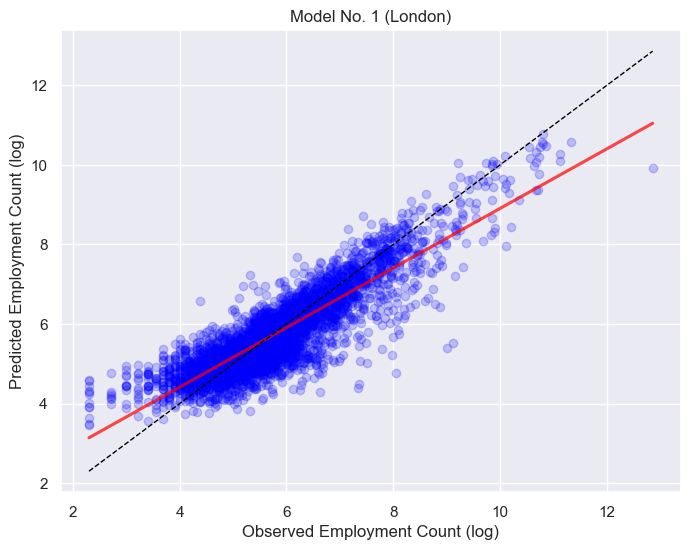

In [272]:
# Plots

# London Generic (Model 1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
sns.set_theme()
sns.regplot(x='target', y='prediction', data=london_generic, ci=None, 
            scatter_kws={"color": "blue", "alpha": 0.2}, 
            line_kws={"color": "red", "alpha": 0.7}, ax=ax1)

# Add Identity Line
max_val = max(max(london_generic['target']), max(london_generic['prediction']))
min_val = min(min(london_generic['target']), min(london_generic['prediction']))
ax1.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', linewidth=1)
ax1.set_title('Model No. 1 (London)')
ax1.set_xlabel('Observed Employment Count (log)')
ax1.set_ylabel('Predicted Employment Count (log)')

# Residual plot
london_generic['residual'] = london_generic['target'] - london_generic['prediction']
fig2, ax2 = plt.subplots(figsize=(8, 6))
sns.set_theme()
sns.regplot(x='target', y='residual', data=london_generic, ci=None, 
            scatter_kws={"color": "blue", "alpha": 0.2}, 
            line_kws={"color": "red", "alpha": 0.7}, ax=ax2)
ax2.set_title('Model No. 1 Residuals')
ax2.set_xlabel('Observed Employment Count (log)')
ax2.set_ylabel('Residual')

Text(0, 0.5, 'Residual')

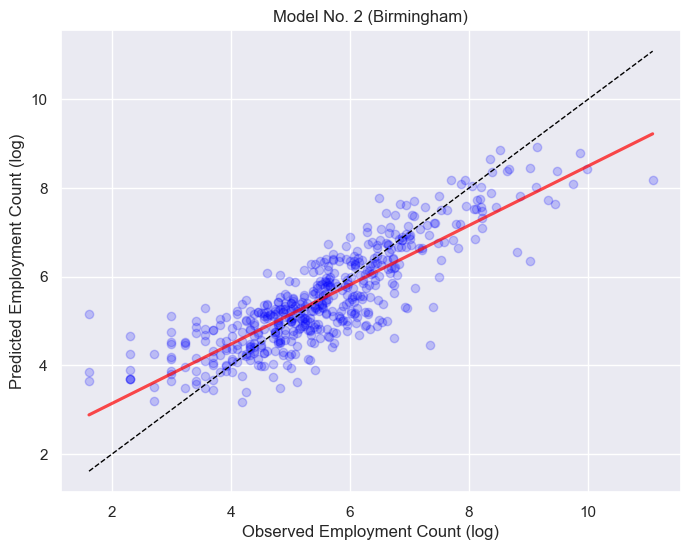

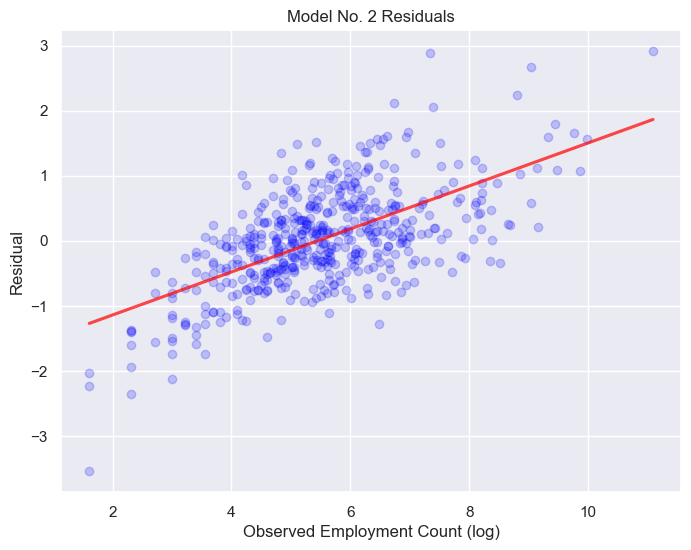

In [274]:
# Birmingham Generic (Model 2)
fig3, ax3 = plt.subplots(figsize=(8, 6))
sns.set_theme()
sns.regplot(x='target', y='prediction', data=bham_generic, ci=None, 
            scatter_kws={"color": "blue", "alpha": 0.2},
            line_kws={"color": "red", "alpha": 0.7}, ax=ax3)

# Add Identity Line
max_val = max(max(bham_generic['target']), max(bham_generic['prediction']))
min_val = min(min(bham_generic['target']), min(bham_generic['prediction']))
ax3.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', linewidth=1)
ax3.set_title('Model No. 2 (Birmingham)')
ax3.set_xlabel('Observed Employment Count (log)')
ax3.set_ylabel('Predicted Employment Count (log)')

# Residual plot
bham_generic['residual'] = bham_generic['target'] - bham_generic['prediction']
fig4, ax4 = plt.subplots(figsize=(8, 6))
sns.set_theme()
sns.regplot(x='target', y='residual', data=bham_generic, ci=None, 
            scatter_kws={"color": "blue", "alpha": 0.2}, 
            line_kws={"color": "red", "alpha": 0.7}, ax=ax4)
ax4.set_title('Model No. 2 Residuals')
ax4.set_xlabel('Observed Employment Count (log)')
ax4.set_ylabel('Residual')

Text(0, 0.5, 'Residual')

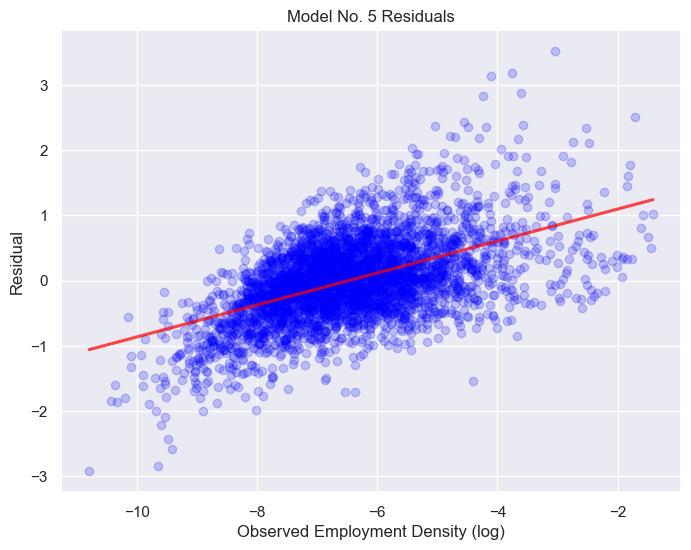

In [276]:
# London Density (Model 3)
fig5, ax5 = plt.subplots(figsize=(8, 6))
sns.set_theme()
sns.regplot(x='target', y='prediction', data=london_density, ci=None, 
            scatter_kws={"color": "blue", "alpha": 0.2}, 
            line_kws={"color": "red", "alpha": 0.7}, ax=ax5)

# Add Identity Line
max_val = max(max(london_density['target']), max(london_density['prediction']))
min_val = min(min(london_density['target']), min(london_density['prediction']))
ax5.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', linewidth=1)
ax5.set_title('Model No. 5 (London)')
ax5.set_xlabel('Observed Employment Density (log)')
ax5.set_ylabel('Predicted Employment Density (log)')

# Residual plot
london_density['residual'] = london_density['target'] - london_density['prediction']
fig6, ax6 = plt.subplots(figsize=(8, 6))
sns.set_theme()
sns.regplot(x='target', y='residual', data=london_density, ci=None, 
            scatter_kws={"color": "blue", "alpha": 0.2}, 
            line_kws={"color": "red", "alpha": 0.7}, ax=ax6)
ax6.set_title('Model No. 5 Residuals')
ax6.set_xlabel('Observed Employment Density (log)')
ax6.set_ylabel('Residual')

In [278]:
# London POI Exclusive

fig7, ax7 = plt.subplots(figsize=(8, 6))
sns.set_theme()
sns.regplot(x='target', y='prediction', data=london_poi_only, ci=None, 
            scatter_kws={"color": "blue", "alpha": 0.2}, 
            line_kws={"color": "red", "alpha": 0.7}, ax=ax7)

# Add Identity Line
max_val = max(max(london_poi_only['target']), max(london_poi_only['prediction']))
min_val = min(min(london_poi_only['target']), min(london_poi_only['prediction']))
ax7.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', linewidth=1)
ax7.set_title('Model No. 25 (London)')
ax7.set_xlabel('Observed Employment Count (log)')
ax7.set_ylabel('Predicted Employment Count (log)')

# Residual plot
london_poi_only['residual'] = london_poi_only['target'] - london_poi_only['prediction']
fig8, ax8 = plt.subplots(figsize=(8, 6))
sns.set_theme()
sns.regplot(x='target', y='residual', data=london_poi_only, ci=None, 
            scatter_kws={"color": "blue", "alpha": 0.2}, 
            line_kws={"color": "red", "alpha": 0.7}, ax=ax8)
ax8.set_title('Model No. 25 Residuals')
ax8.set_xlabel('Observed Employment Count (log)')
ax8.set_ylabel('Residual')

Text(0, 0.5, 'Residual')

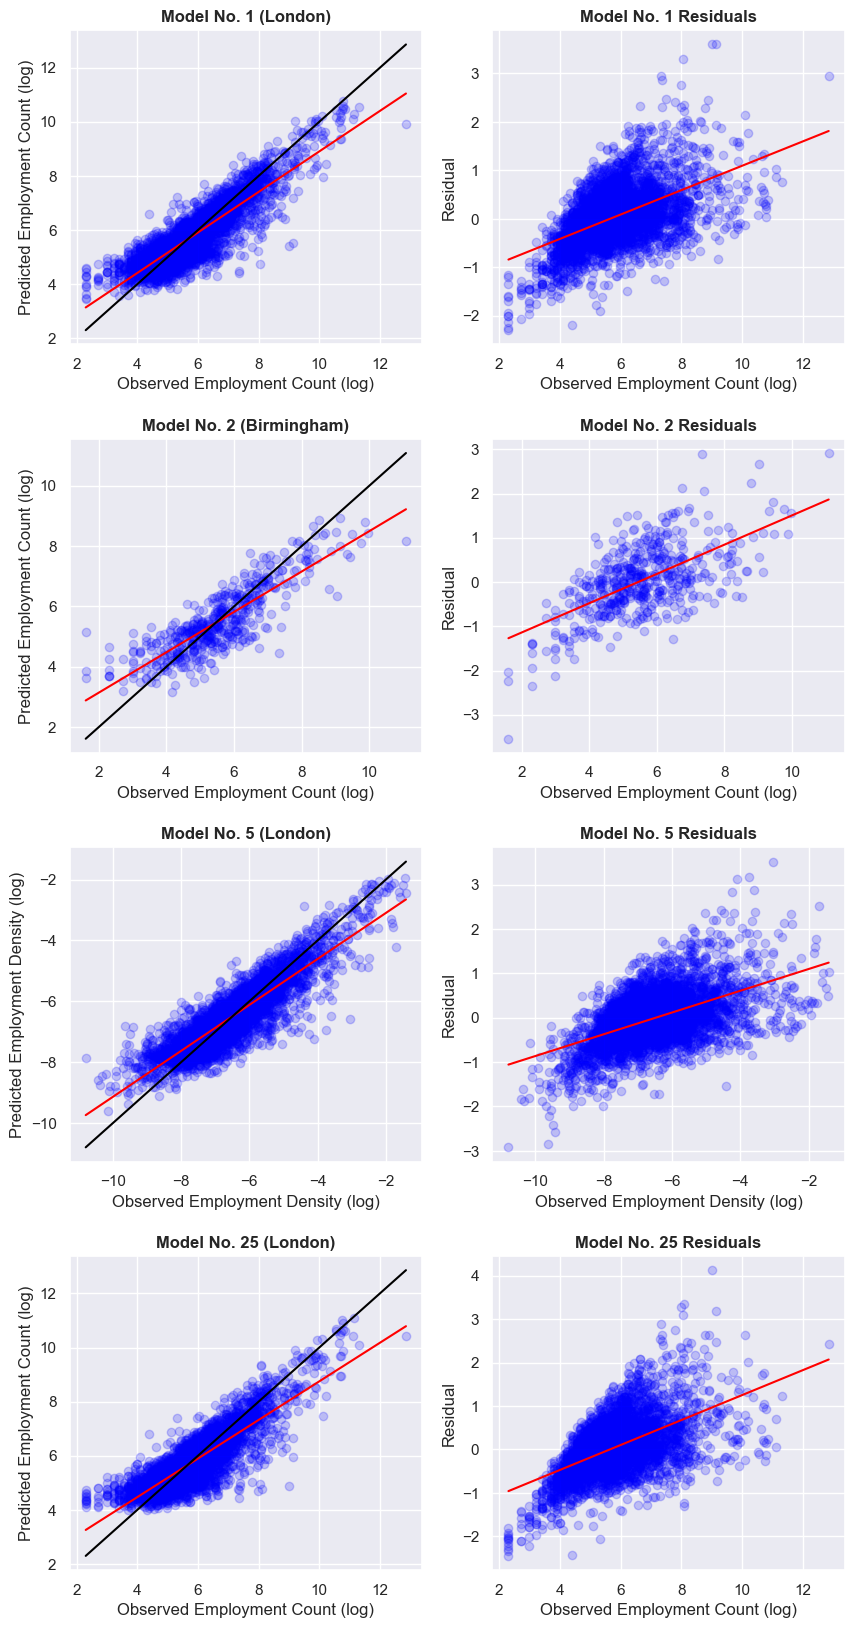

In [282]:
### Matrix
fig = plt.figure(figsize=(10, 20))
gs = gridspec.GridSpec(4, 2, figure=fig)

# Create new axes for the grid
ax_grid1 = fig.add_subplot(gs[0, 0])
ax_grid2 = fig.add_subplot(gs[0, 1])
ax_grid3 = fig.add_subplot(gs[1, 0])
ax_grid4 = fig.add_subplot(gs[1, 1])
ax_grid5 = fig.add_subplot(gs[2, 0])
ax_grid6 = fig.add_subplot(gs[2, 1])
ax_grid7 = fig.add_subplot(gs[3, 0])
ax_grid8 = fig.add_subplot(gs[3, 1])

# List of the original axes and new grid axes
original_axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
grid_axes = [ax_grid1, ax_grid2, ax_grid3, ax_grid4, ax_grid5, ax_grid6, ax_grid7, ax_grid8]

# Copy content from each original axis to the new axes
for orig_ax, grid_ax in zip(original_axes, grid_axes):
    # Copy lines
    for line in orig_ax.get_lines():
        grid_ax.plot(line.get_xdata(), line.get_ydata(), label=line.get_label(), color=line.get_color())
    # Copy patches (e.g., bars)
    for patch in orig_ax.patches:
        grid_ax.add_patch(patch)
    for path_collection in orig_ax.collections:
        offsets = path_collection.get_offsets()
        colors = path_collection.get_facecolors()
        grid_ax.scatter(offsets[:, 0], offsets[:, 1], color=colors, alpha=0.2)
    # Copy text
    for text in orig_ax.texts:
        grid_ax.text(text.get_position()[0], text.get_position()[1], text.get_text(), **text.get_fontproperties())
    # Copy labels and title
    grid_ax.set_xlabel(orig_ax.get_xlabel())
    grid_ax.set_ylabel(orig_ax.get_ylabel())
    grid_ax.set_title(orig_ax.get_title(), fontweight='bold')
    # Copy legend if present
    if orig_ax.get_legend():
        grid_ax.legend(loc='best')

# Adjust layout to prevent overlap and provide space for annotations
plt.subplots_adjust(hspace=0.3)
plt.show()

### Actual Map + Predicted Map - London Model No. 5 (Density) - borrowed from Outlier Analysis 

In [298]:
# Load Model Results

# log Employment
london_model = pd.read_csv("data/combined_data/model_results_london_density.csv", index_col=0)

# Convert Geometry col to make GeoDataFrame
london_model['geometry'] = london_model['geometry'].apply(loads)
london_model = gpd.GeoDataFrame(london_model, crs='EPSG:4326', geometry = london_model['geometry'])

london_model.head()

geometry  observed  predicted
0  POLYGON ((0.17380 51.56013, 0.17379 51.56012, ... -6.584050  -7.240142
1  POLYGON ((0.16598 51.55250, 0.16601 51.55248, ... -4.536248  -5.173426
2  POLYGON ((0.15965 51.54776, 0.15974 51.54771, ... -7.176561  -6.262146
3  POLYGON ((0.18508 51.56480, 0.18476 51.56454, ... -7.037642  -7.201249
4  POLYGON ((0.17599 51.56476, 0.17601 51.56475, ... -6.586970  -7.090306

In [328]:
# Actual plot

# Standardised colour min/max vals - this fudges a few LSOAs with almost no employment but makes the plot much more readable which I think is a worthwhile tradeoff
observed_min = london_model['predicted'].min()
observed_max = max(london_model['observed'].max(), london_model['predicted'].max())

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
london_model.plot(ax=ax, column='observed', linewidth=0, legend = True, cmap='viridis',
                     vmin=observed_min, vmax=observed_max,
                     legend_kwds = {
                         'label': "Observed Employment Density (log)",
                        'orientation': "horizontal",
                        'pad' : 0.00,
                        'shrink': 0.4,
                        'aspect': 30})

ax.set_axis_off()
plt.show()

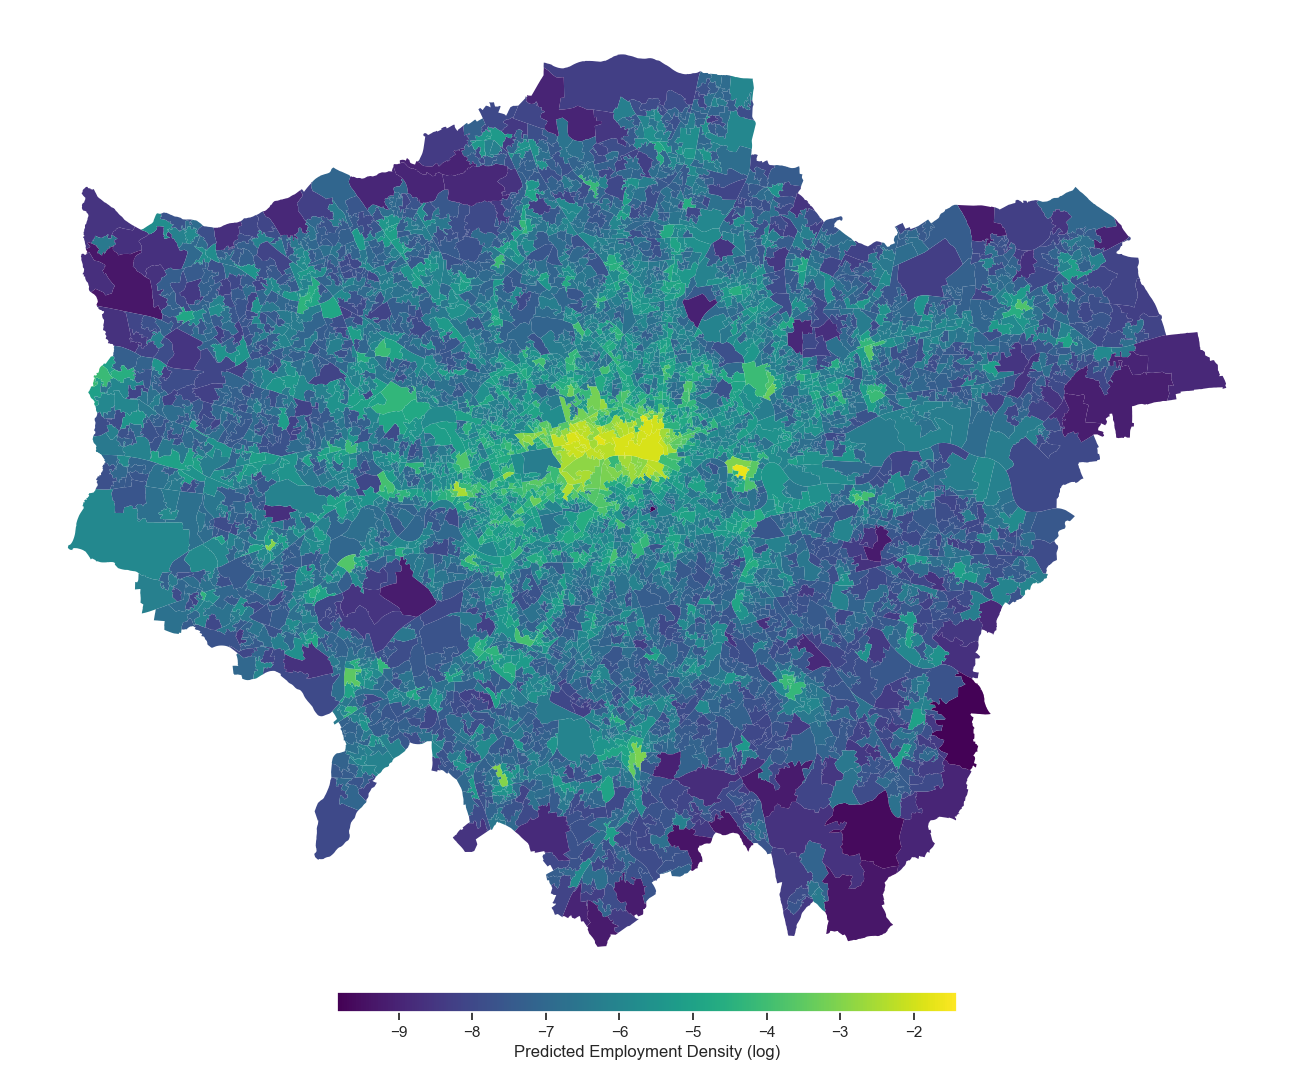

In [330]:
# Predicted Plot

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
london_model.plot(ax=ax, column='predicted', linewidth=0, legend = True, cmap='viridis',
                     vmin=observed_min, vmax=observed_max,
                     legend_kwds = {
                         'label': "Predicted Employment Density (log)",
                        'orientation': "horizontal",
                        'pad' : 0.00,
                        'shrink': 0.4,
                        'aspect': 30})

ax.set_axis_off()
plt.show()